In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('IRIS.csv')

# Split the data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create MLPClassifier model
mlp = MLPClassifier(max_iter=4000)

# Define hyperparameters for GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(5,4,1), (3,2,2), (5,3)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Perform GridSearchCV to find the best parameters
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

# Print best hyperparameters found
print('Best parameters found:\n', clf.best_params_)

# Get the best estimator from GridSearchCV
best_mlp = clf.best_estimator_

# Train the best model on the training data
best_mlp.fit(X_train, y_train)

# Predict on train and test data
y_pred_train = best_mlp.predict(X_train)
y_pred_test = best_mlp.predict(X_test)

# Calculate accuracy for train and test data
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy on Train Data: {accuracy_train:.2f}')
print(f'Accuracy on Test Data: {accuracy_test:.2f}')

# Classification Report for Test Data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 3), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy on Train Data: 1.00
Accuracy on Test Data: 1.00
Classification Report (Test Data):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



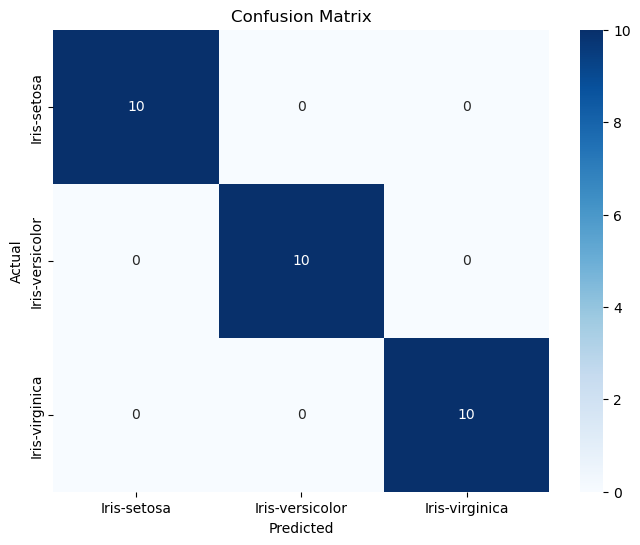

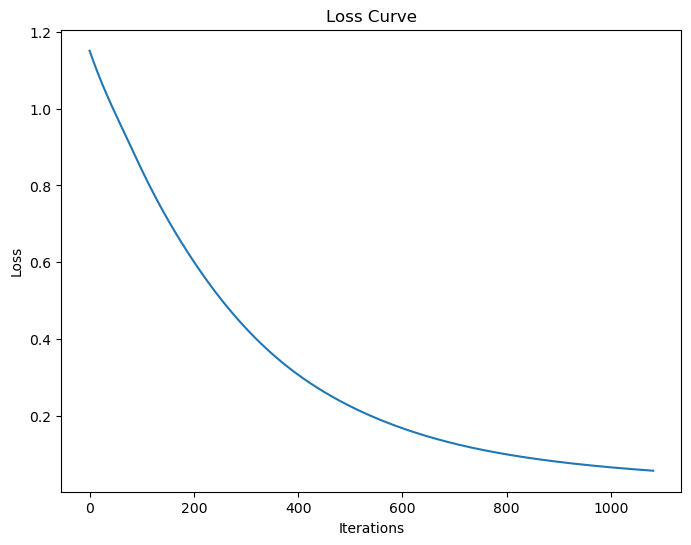

In [12]:
# Confusion Matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_mlp.classes_, 
            yticklabels=best_mlp.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Loss Curve during training
plt.figure(figsize=(8, 6))
plt.plot(best_mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()